In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
# Build a base URL to query Weather Map Websitequery URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url =  url + "appid=" + weather_api_key + "&units=imperial"
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=3f6d4d825c38a6e5293a2b4ae509cde7&units=imperial'

In [4]:
# Create lists to append API data
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# call counter
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the cities list 
for city in cities:  
    
    # Try statement to append calls where value is found 
        try: 
            response = requests.get(f"{query_url}&q={city}").json()
            city_name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            max_temp.append(response["main"]["temp_max"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            wind_speed.append(response["wind"]["speed"])
            city_record = response["name"]
            print(f"Processing Record {record} | {city_record}")
            print(f"{url}&q={city}")

            # Increase counter by one 
            record= record + 1

            # Wait a second in loop to not over exceed rate limit of API
            time.sleep(1)
        
    # If no record found "skip" to next call
        except:
            print("City not found. Skipping...")
        continue

Beginning Data Retrieval
-------------------------------
Beginning Data Retrieval
-------------------------------
Processing Record 1 | Minbu
http://api.openweathermap.org/data/2.5/weather?&q=minbu
Processing Record 2 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?&q=tuktoyaktuk
Processing Record 3 | Cape Town
http://api.openweathermap.org/data/2.5/weather?&q=cape town
Processing Record 4 | Bluff
http://api.openweathermap.org/data/2.5/weather?&q=bluff
Processing Record 5 | Kochubey
http://api.openweathermap.org/data/2.5/weather?&q=kochubey
Processing Record 6 | San Quintín
http://api.openweathermap.org/data/2.5/weather?&q=san quintin
Processing Record 7 | Altamont
http://api.openweathermap.org/data/2.5/weather?&q=altamont
Processing Record 8 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?&q=los llanos de aridane
Processing Record 9 | Verkhotur'ye
http://api.openweathermap.org/data/2.5/weather?&q=verkhoturye
Processing Record 10 | Verkh-Usugli
http:

Processing Record 87 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?&q=cabo san lucas
Processing Record 88 | Tura
http://api.openweathermap.org/data/2.5/weather?&q=tura
Processing Record 89 | Sorong
http://api.openweathermap.org/data/2.5/weather?&q=sorong
Processing Record 90 | Dingle
http://api.openweathermap.org/data/2.5/weather?&q=dingle
Processing Record 91 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?&q=port moresby
Processing Record 92 | Babīna
http://api.openweathermap.org/data/2.5/weather?&q=babina
Processing Record 93 | Flinders
http://api.openweathermap.org/data/2.5/weather?&q=flinders
Processing Record 94 | Constitución
http://api.openweathermap.org/data/2.5/weather?&q=constitucion
Processing Record 95 | Pevek
http://api.openweathermap.org/data/2.5/weather?&q=pevek
Processing Record 96 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?&q=qaanaaq
Processing Record 97 | Olivença
http://api.openweathermap.org/data/2.5/weather?&q=olivenca

Processing Record 175 | Tomatlán
http://api.openweathermap.org/data/2.5/weather?&q=tomatlan
City not found. Skipping...
Processing Record 176 | Klyuchi
http://api.openweathermap.org/data/2.5/weather?&q=klyuchi
Processing Record 177 | Centralia
http://api.openweathermap.org/data/2.5/weather?&q=centralia
Processing Record 178 | Neijiang
http://api.openweathermap.org/data/2.5/weather?&q=neijiang
Processing Record 179 | Petrozavodsk
http://api.openweathermap.org/data/2.5/weather?&q=petrozavodsk
Processing Record 180 | Roebourne
http://api.openweathermap.org/data/2.5/weather?&q=roebourne
Processing Record 181 | Soyo
http://api.openweathermap.org/data/2.5/weather?&q=soyo
Processing Record 182 | Zyryanovsk
http://api.openweathermap.org/data/2.5/weather?&q=zyryanovsk
Processing Record 183 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?&q=vestmannaeyjar
City not found. Skipping...
Processing Record 184 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?&q=fairbanks
Proc

City not found. Skipping...
Processing Record 260 | Whitewater
http://api.openweathermap.org/data/2.5/weather?&q=whitewater
Processing Record 261 | Nuevo Casas Grandes
http://api.openweathermap.org/data/2.5/weather?&q=nuevo casas grandes
Processing Record 262 | Hargeisa
http://api.openweathermap.org/data/2.5/weather?&q=hargeysa
Processing Record 263 | Talara
http://api.openweathermap.org/data/2.5/weather?&q=talara
Processing Record 264 | Río Gallegos
http://api.openweathermap.org/data/2.5/weather?&q=rio gallegos
Processing Record 265 | Rosario
http://api.openweathermap.org/data/2.5/weather?&q=rosario
Processing Record 266 | Barinas
http://api.openweathermap.org/data/2.5/weather?&q=barinas
Processing Record 267 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?&q=longyearbyen
Processing Record 268 | Yerofey Pavlovich
http://api.openweathermap.org/data/2.5/weather?&q=yerofey pavlovich
Processing Record 269 | Kalmunai
http://api.openweathermap.org/data/2.5/weather?&q=kalmunai


City not found. Skipping...
Processing Record 344 | Kununurra
http://api.openweathermap.org/data/2.5/weather?&q=kununurra
Processing Record 345 | Bubaque
http://api.openweathermap.org/data/2.5/weather?&q=bubaque
Processing Record 346 | Sambava
http://api.openweathermap.org/data/2.5/weather?&q=sambava
Processing Record 347 | Berbera
http://api.openweathermap.org/data/2.5/weather?&q=berbera
Processing Record 348 | Jiuquan
http://api.openweathermap.org/data/2.5/weather?&q=jiuquan
Processing Record 349 | Ngunguru
http://api.openweathermap.org/data/2.5/weather?&q=ngunguru
Processing Record 350 | Mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?&q=mnogovershinnyy
Processing Record 351 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?&q=port macquarie
Processing Record 352 | Lamesa
http://api.openweathermap.org/data/2.5/weather?&q=lamesa
Processing Record 353 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?&q=kavaratti
Processing Record 354 | The Valley

City not found. Skipping...
Processing Record 431 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?&q=port-gentil
Processing Record 432 | Loknya
http://api.openweathermap.org/data/2.5/weather?&q=loknya
Processing Record 433 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?&q=tasiilaq
Processing Record 434 | Erátyra
http://api.openweathermap.org/data/2.5/weather?&q=eratira
Processing Record 435 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?&q=zhigansk
Processing Record 436 | Chuguyevka
http://api.openweathermap.org/data/2.5/weather?&q=chuguyevka
Processing Record 437 | Shingū
http://api.openweathermap.org/data/2.5/weather?&q=shingu
Processing Record 438 | Wanning
http://api.openweathermap.org/data/2.5/weather?&q=wanning
Processing Record 439 | Kisangani
http://api.openweathermap.org/data/2.5/weather?&q=kisangani
Processing Record 440 | Durazno
http://api.openweathermap.org/data/2.5/weather?&q=durazno
Processing Record 441 | Syriam
http://api.openweatherm

Processing Record 518 | Peniche
http://api.openweathermap.org/data/2.5/weather?&q=peniche
Processing Record 519 | Peruíbe
http://api.openweathermap.org/data/2.5/weather?&q=peruibe
City not found. Skipping...
Processing Record 520 | Miandrivazo
http://api.openweathermap.org/data/2.5/weather?&q=miandrivazo
Processing Record 521 | Tukums
http://api.openweathermap.org/data/2.5/weather?&q=tukums
Processing Record 522 | Muros
http://api.openweathermap.org/data/2.5/weather?&q=muros
Processing Record 523 | Manta
http://api.openweathermap.org/data/2.5/weather?&q=manta
Processing Record 524 | Lamu
http://api.openweathermap.org/data/2.5/weather?&q=lamu
Processing Record 525 | Malartic
http://api.openweathermap.org/data/2.5/weather?&q=malartic
Processing Record 526 | Tubualá
http://api.openweathermap.org/data/2.5/weather?&q=tubuala
City not found. Skipping...
Processing Record 527 | Sinazongwe
http://api.openweathermap.org/data/2.5/weather?&q=sinazongwe
Processing Record 528 | Goundam
http://api.o

In [5]:
# create a dictionary to construct dataframe
weather_py = {"City":city_name,
             "Lat":lat,
             "Lng":lng,
             "Max Temp":max_temp,
             "Humidity":humidity,
             "Cloudiness":cloudiness,
             "Wind Speed":wind_speed,
             "Country":country,
             "date":date
             }

weather_df = pd.DataFrame(weather_py)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
0,Minbu,20.1833,94.8833,76.91,31,0,3.51,MM,1615661466
1,Tuktoyaktuk,69.4541,-133.0374,-13.00,77,90,5.75,CA,1615661467
2,Cape Town,-33.9258,18.4232,72.00,78,75,9.22,ZA,1615661171
3,Bluff,-46.6000,168.3333,46.99,88,4,1.01,NZ,1615661469
4,Kochubey,44.3861,46.5825,28.76,88,17,13.27,RU,1615661471
...,...,...,...,...,...,...,...,...,...
576,Hervey Bay,-25.2986,152.8535,70.00,92,49,7.00,AU,1615661963
577,Forsytheganj,52.6333,29.7333,36.07,95,100,12.95,BY,1615662113
578,Benghazi,32.1167,20.0667,60.17,60,100,15.28,LY,1615662188
579,Tinyahuarco,-10.7500,-76.3000,49.82,71,100,5.82,PE,1615662189


In [6]:
# Export the city data into a CSV
weather_df.to_csv('../output_data/city_data.csv', index=False)


In [7]:
weather_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,19.184623,16.534044,55.514010,70.087780,44.641997,8.273597,1.615662e+09
std,33.056175,90.749290,28.049474,21.284385,40.590757,6.023751,2.248260e+02
min,-54.800000,-179.166700,-31.270000,5.000000,0.000000,0.090000,1.615661e+09
25%,-8.613600,-61.998600,39.200000,59.000000,1.000000,4.000000,1.615662e+09
50%,22.616300,23.104700,64.240000,75.000000,40.000000,6.910000,1.615662e+09
75%,45.616900,96.128500,78.300000,87.000000,90.000000,10.580000,1.615662e+09
max,78.218600,179.316700,100.000000,100.000000,100.000000,41.880000,1.615662e+09


In [27]:
#weather_df = weather_df.loc[weather_df['Humidity'] >100 ]

# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.\
Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

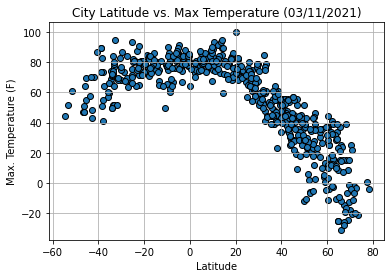

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolors = "black")
plt.title("City Latitude vs. Max Temperature (03/11/2021)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Latitude vs. Humidity Plot

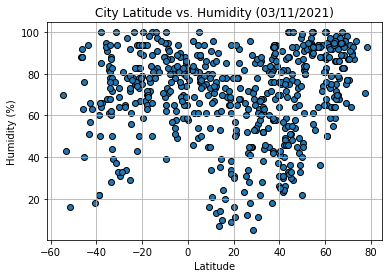

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors = "black")
plt.title("City Latitude vs. Humidity (03/11/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Latitude vs. Cloudiness Plot

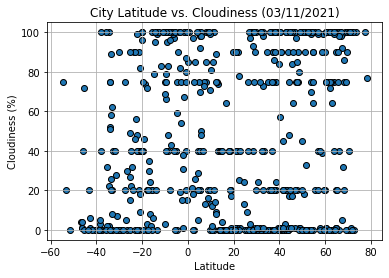

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolors = "black")
plt.title("City Latitude vs. Cloudiness (03/11/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Latitude vs. Wind Speed Plot

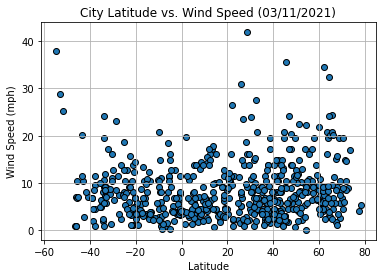

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolors = "black")
plt.title("City Latitude vs. Wind Speed (03/11/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Linear Regression

In [13]:
north_hem = weather_df.loc[weather_df['Lat']>=0]
south_hem = weather_df.loc[weather_df['Lat']<0]      

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8904663630958908


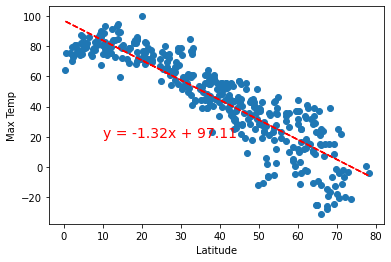

In [14]:
s,i,r,p,s_err = st.linregress(north_hem['Lat'],north_hem['Max Temp'])
fit = s * north_hem['Lat'] + i
val = f'y = {round(s,2)}x + {round(i,2)}'
print(f"The r-value is: {r}")
plt.scatter(north_hem['Lat'],north_hem['Max Temp'])
plt.plot(north_hem['Lat'], fit, "--", color='red')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(val, (10,20), fontsize=14, color='red')
plt.show()

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5566363363875714


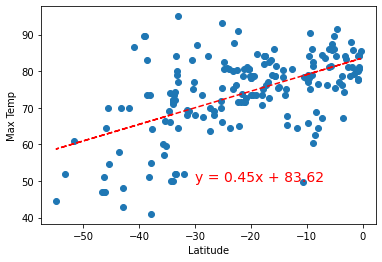

In [15]:
s,i,r,p,s_err = st.linregress(south_hem['Lat'],south_hem['Max Temp'])
fit = s * south_hem['Lat'] + i
val = f'y = {round(s,2)}x + {round(i,2)}'
print(f"The r-value is: {r}")
plt.scatter(south_hem['Lat'],south_hem['Max Temp'])
plt.plot(south_hem['Lat'], fit, "--", color='red')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(val, (-30,50), fontsize=14, color='red')
plt.show()

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.28599819175472607


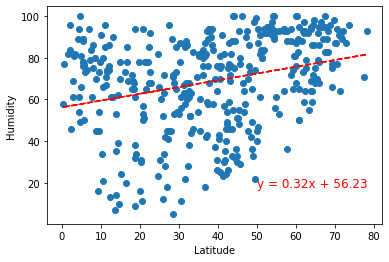

In [16]:
s,i,r,p,s_err = st.linregress(north_hem['Lat'],north_hem['Humidity'])
fit = s * north_hem['Lat'] + i
val = f'y = {round(s,2)}x + {round(i,2)}'
print(f"The r-value is: {r}")
plt.scatter(north_hem['Lat'],north_hem['Humidity'])
plt.plot(north_hem['Lat'], fit, "--", color='red')
plt.ylabel('Humidity ')
plt.xlabel('Latitude')
plt.annotate(val, (50,18), fontsize=12, color='red')
plt.show()

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24787482445215928


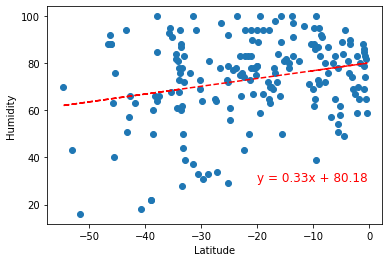

In [17]:
s,i,r,p,s_err = st.linregress(south_hem['Lat'],south_hem['Humidity'])
fit = s * south_hem['Lat'] + i
val = f'y = {round(s,2)}x + {round(i,2)}'
print(f"The r-value is: {r}")
plt.scatter(south_hem['Lat'],south_hem['Humidity'])
plt.plot(south_hem['Lat'], fit, "--", color='red')
plt.ylabel('Humidity ')
plt.xlabel('Latitude')
plt.annotate(val, (-20,30), fontsize=12, color='red')
plt.show()

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1789544253351937


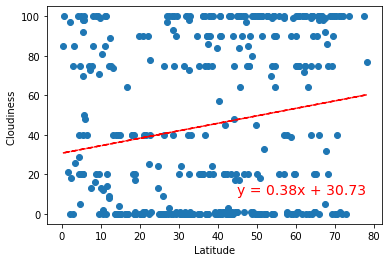

In [18]:
s,i,r,p,s_err = st.linregress(north_hem['Lat'],north_hem['Cloudiness'])
fit = s * north_hem['Lat'] + i
val = f'y = {round(s,2)}x + {round(i,2)}'
print(f"The r-value is: {r}")
plt.scatter(north_hem['Lat'],north_hem['Cloudiness'])
plt.plot(north_hem['Lat'], fit, "--", color='red')
plt.ylabel('Cloudiness ')
plt.xlabel('Latitude')
plt.annotate(val, (45,10), fontsize=14, color='red')
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4455864364806951


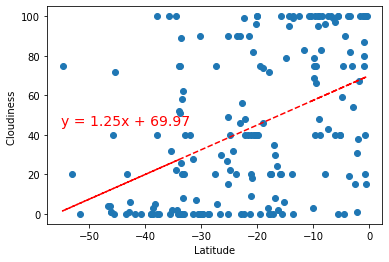

In [24]:
s,i,r,p,s_err = st.linregress(south_hem['Lat'],south_hem['Cloudiness'])
fit = s * south_hem['Lat'] + i
val = f'y = {round(s,2)}x + {round(i,2)}'
print(f"The r-value is: {r}")
plt.scatter(south_hem['Lat'],south_hem['Cloudiness'])
plt.plot(south_hem['Lat'], fit, "--", color='red')
plt.ylabel('Cloudiness ')
plt.xlabel('Latitude')
plt.annotate(val, (-55,45), fontsize=14, color='red')
plt.show()

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14044944951324875


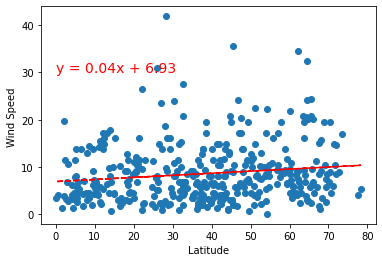

In [20]:
s,i,r,p,s_err = st.linregress(north_hem['Lat'],north_hem['Wind Speed'])
fit = s * north_hem['Lat'] + i
val = f'y = {round(s,2)}x + {round(i,2)}'
print(f"The r-value is: {r}")
plt.scatter(north_hem['Lat'],north_hem['Wind Speed'])
plt.plot(north_hem['Lat'], fit, "--", color='red')
plt.ylabel('Wind Speed ')
plt.xlabel('Latitude')
plt.annotate(val, (0,30), fontsize=14, color='red')
plt.show()

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2635326394483851


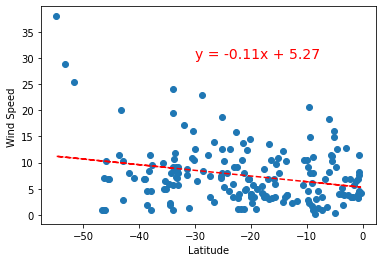

In [21]:
s,i,r,p,s_err = st.linregress(south_hem['Lat'],south_hem['Wind Speed'])
fit = s * south_hem['Lat'] + i
val = f'y = {round(s,2)}x + {round(i,2)}'
print(f"The r-value is: {r}")
plt.scatter(south_hem['Lat'],south_hem['Wind Speed'])
plt.plot(south_hem['Lat'], fit, "--", color='red')
plt.ylabel('Wind Speed ')
plt.xlabel('Latitude')
plt.annotate(val, (-30,30), fontsize=14, color='red')
plt.show()